
# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 8 - Sentiment Analysis Model </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://mlfbg.github.io/MachineLearningInFinance/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1sjZtaB-dlZVO7EsWpjkZHCNbQ11hLWgQ?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

The Objective of this session is to create a sentiment analysis model on the **Toxic Comments** dataset. 

You are provided with a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. 

The types of toxicity are:

* toxic
* severe_toxic
* obscene
* threat
* insult
* identity_hate

In [ ]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import basic libraries
import matplotlib.pyplot as plt # for plotting 
import numpy as np # for manipulating arrays
import tensorflow as tf # for creating Neural Networks, we will use it to load data
import os 
import pandas as pd
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

# 1. Preprocessing the Data

The objective of this session is to load the data and preprocess it into a `(N, T)` tensor:

* `N` is the number of samples.
* `T` is the length of the sequences. 

All the sequences should be of the same length. 

* First, we need to decide what should be the length `T` (another hyperparameter)
* Then, for each sequence:
  * If it's shorter than `T`, the sequence is padded with zeros.
  * If it's longer than `T`, the sequence is truncated.  


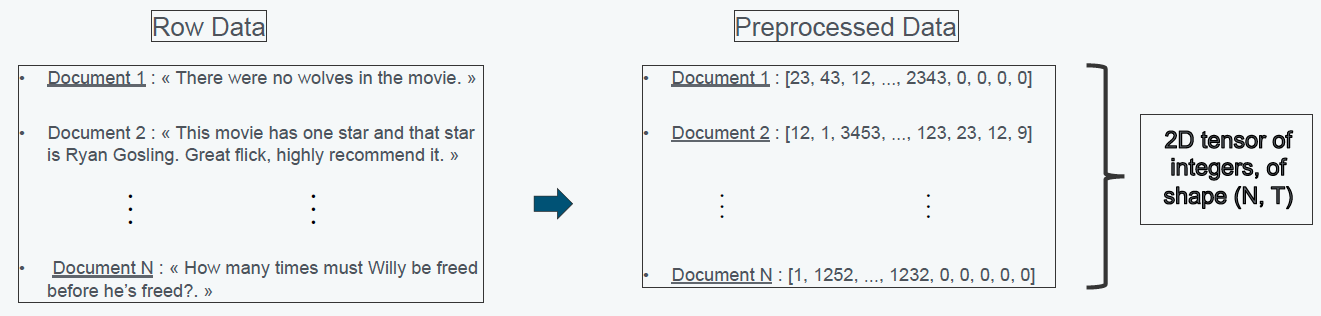

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/Preprocessing.png',  width=1000) 

You can find the data in the following [link](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data). You can then store the file `train.csv` in a directory called `data`. 

You will find the following columns:

* `comment_text` contains the comments

* `toxic`, `severe_toxinc`, `obscene`, `threat`, `insult` and `identity_hate`.  are the different labels we want to predict.

Q1. Load the list of text comments from the dataframe and the labels as an `(N, K)` (where N is the dataframe length and `K=6` is the number of target variables we want to predict)



In [ ]:
# path to data
data_dir = os.path.join("./gdrive/My Drive/Colab Notebooks/Programming_Session_8/", "data")

# Load the dataframe


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
# Get the sentences

# Get the labels


Q2. Preprocess the comment texts and transform them into sequences of integers:

* Use `Tokenizer` from `tensorflow.keras.preprocessing.text` to create your tokenizer
* Create your word_index dictionary
* Transform your texts into sequences of integers via your word_index dictionary. 

In [ ]:
# Import module

# Set hyperparameter

# Create the tokenizer 

# Fit the tokenizer to the texts

# Transform sentences into integers


Q3. Using `pad_sequences` from `tensorflow.keras.preprocessing.sequence`, transform the list of sequences into an `(N, T)` tensor. (Set `T = 200`) 

Q4. Shuffle the rows of the `(N, T)` tensor of data and the `(N, K)` tensor of targets and split your data into Training (80% of data) and testing (20% of data)

# 2. Creating the Embedding Matrix

## 2.1 Creating the Embedding index dictionary

The objective of this session is to load a pretrained embedding matrix

We introduced the **Word2vec** algorithm in the previous programming session, let's use the **Glove** pre-trained vectors for this session. 

It was introduced by Stanford researchers in 2014. It's based on factorizing a matrix of word co-occurence statistics.

It's developers have made available precomputed embeddings for millions of English tokens, obtained from Wikipedia data. 

Q5. First, go to the following [link](https://nlp.stanford.edu/projects/glove) and download the precomputed embeddings from 2014 English Wikipedia. It’s an 822 MB zip file called glove.6B.zip, containing 100-dimensional embedding vectors for 400,000 words (or nonword tokens). Unzip it and store in the data folder. 

Then, create a dictionary called `embedding_index` that maps each word to a vector of size 100 as shown in the following figure:

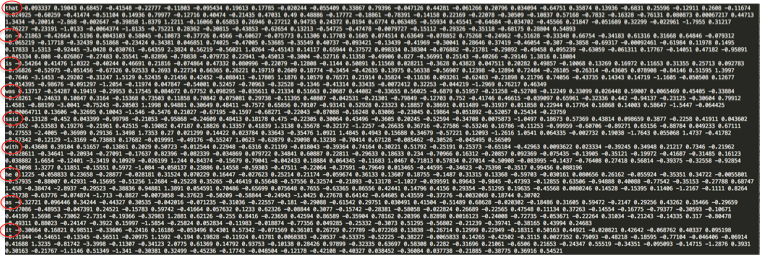

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/embeddings.png',  width=1000) 

In [ ]:
# Directory of the Embedding file
dir_glove = os.path.join(data_dir, "glove.6B")

# Create the dictionary


## 2.2. Creating the Embedding matrix

Q6. Create a matrix called `embedding_matrix` of shape `(V, D)` where `D` is the embedding dimension and `V` the vocabulary size. 
* In this matrix, the row number k will be represented by the embedding vector associated with the word of index k in the `embedding_index` dictionary. 
* If the word of index k is not in the `embedding_index` dictionary, we represent it by a vector of zeros in the embedding matrix. 

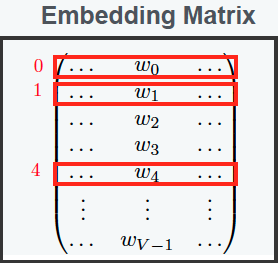

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/Embedding_Matrix2.png',  width=300) 

In [ ]:
# The embedding dimension
D = 100

# Initialize the embedding matrix
embedding_matrix = np.zeros((V, D))

# Loop through the all the elements of the word_index dictionary:
for word, index in word_index.items():
  if index < V:
    # get the embedding vector for embedding_index dictionary
    embedding_vector = embedding_index.get(word)
    # update the embedding matrix 
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       ...,
       [-1.04809999, -0.32789999, -0.46593001, ..., -0.065447  ,
        -0.13019   ,  0.44433001],
       [ 0.089782  , -0.33164999, -0.85716999, ..., -0.15765999,
        -0.58174002,  0.036233  ],
       [ 0.051446  , -0.43564001,  0.26989001, ...,  0.39087   ,
        -0.14459001, -0.72372001]])

In [ ]:
word_index["france"]


2079

In [ ]:
embedding_index["france"]

array([ 0.4359   , -0.04961  ,  0.31388  ,  0.6056   ,  0.36372  ,
       -0.03974  ,  0.42844  ,  0.58571  , -0.0048055, -0.24868  ,
       -0.069374 ,  0.036042 , -0.68352  ,  0.55531  , -0.36235  ,
        0.13997  ,  0.020455 , -0.82498  , -0.68761  ,  0.28685  ,
        0.37247  ,  0.62814  ,  0.45655  ,  0.11955  ,  1.087    ,
       -1.3191   ,  0.1611   , -0.37508  ,  1.1136   , -0.8442   ,
       -0.78734  , -0.61974  , -0.48193  , -0.76358  ,  0.55343  ,
        0.80071  ,  0.53818  , -0.13143  , -1.2196   , -0.10605  ,
       -0.60646  , -0.45015  ,  0.34853  , -0.49596  ,  0.31408  ,
        0.24088  ,  0.28625  , -0.11539  ,  0.40018  , -0.94102  ,
        0.30618  ,  1.3605   , -0.75011  ,  1.3509   , -1.1497   ,
       -2.6059   , -0.078406 ,  0.09977  ,  0.93239  ,  0.15718  ,
        1.0857   , -0.52454  ,  0.14787  , -0.61679  ,  0.49391  ,
        0.38589  , -1.264    ,  0.78695  ,  0.13566  ,  0.22713  ,
        0.49846  , -0.25495  , -0.88281  , -0.17737  ,  0.5036

# 3. Creating the Model

## 3.1 Using pre-trained word vectors (embedding_matrix) from GloVe

Q7. Using `Embedding` from `tensorflow.keras.layers`, create the embedding layer called `embedding_layer`

* This layer transforms an `(N, T)` tensor of integers into an `(N, T, D)` tensor.
* Load the `embedding_matrix` into the `embedding_layer`

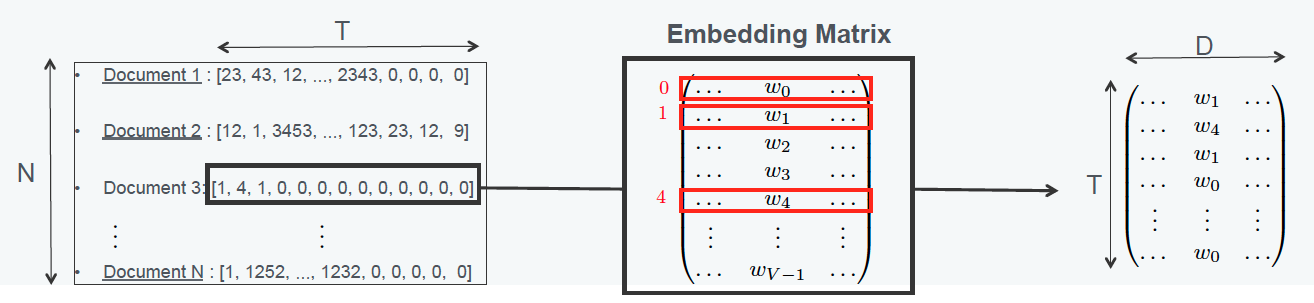

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/Embedding_Matrix1.png',  width=1000) 

In [ ]:
# Import the Embedding layer from tensorflow


Q8. Create the following model:

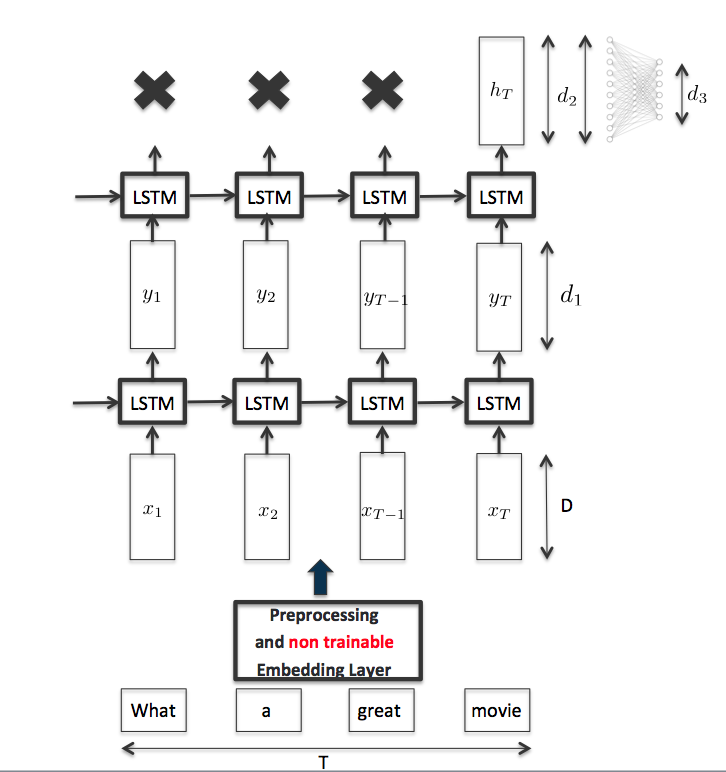

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/Model_1.png',  width=700) 

(N, T) -> (N, T, D) -> (N, T, d_1) -> (N, d_2) -> (N, d_3)

* Embedding layer 
* lstm_1 (keep all the outputs)
* lstm_2 (keep the last one)
* dense layer 

In [ ]:
# Import modules
 

# Set the hyperparameters


# Create the LSTM layers


# The input tensor

# Apply the embedding layer 

# Apply the first LSTM layer 

# Apply the second LSTM layer

# Apply the dense layer 


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 100)          2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 200, 32)           17024     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
Total params: 2,020,262
Trainable params: 20,262
Non-trainable params: 2,000,000
_________________________________________________________________


Q9. Compile your model by using **Adam** algorithm for the optimization instead of Stochastic Gradient Descent (See the following [link](https://arxiv.org/pdf/1412.6980.pdf).

Adam is a modern adaptive learning rate technique, often considered as the default algorithm for many DL practitioners. It combines the idea of **momentum** and **adaptive learning rate** as shown in the following figure:



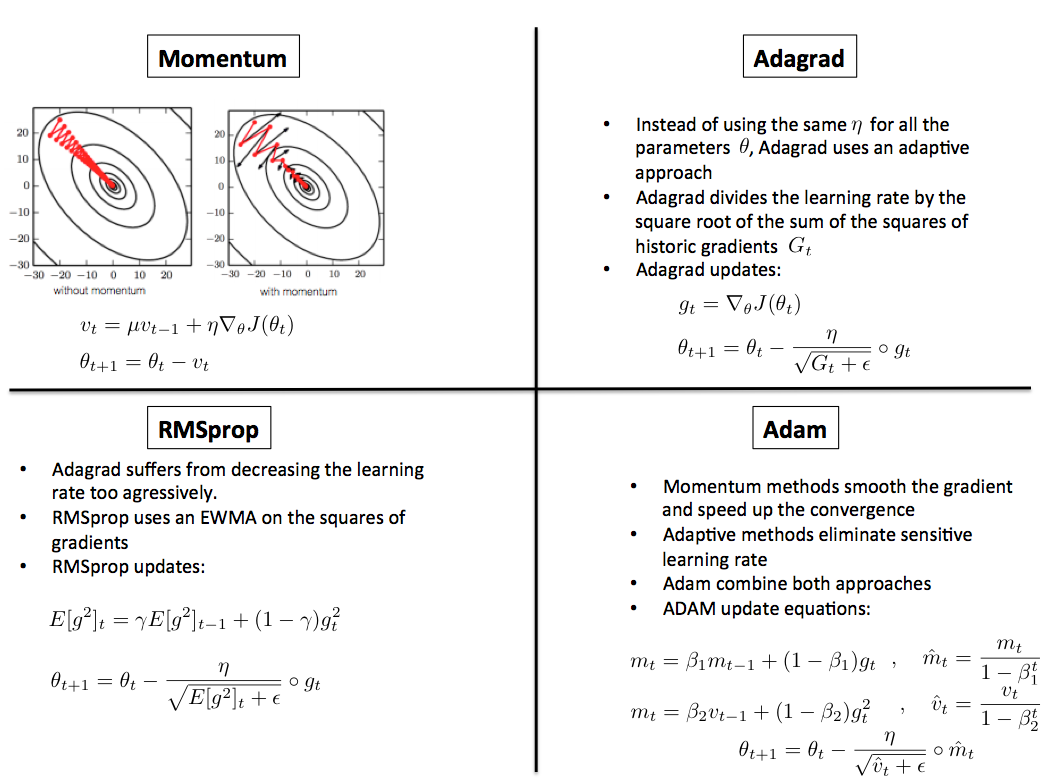

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/adam.png',  width=1000) 

Q10. Fit your model to the training data. 

* Use `EarlyStopping` from `tensorflow.keras.callbacks` to stop the training when the accuracy doesn't improve.

* Use `ReduceLROnPlatea` from `tensorflow.keras.callbacks` to reduce the learning rate when the validation loss doesn't improve 

Q11. Test your model on the test data 

998/998 [==============================] - 34s 34ms/step - loss: 0.0838 - accuracy: 0.9937


[0.08376006036996841, 0.9937333464622498]

Q12. Plot the training and validation loss

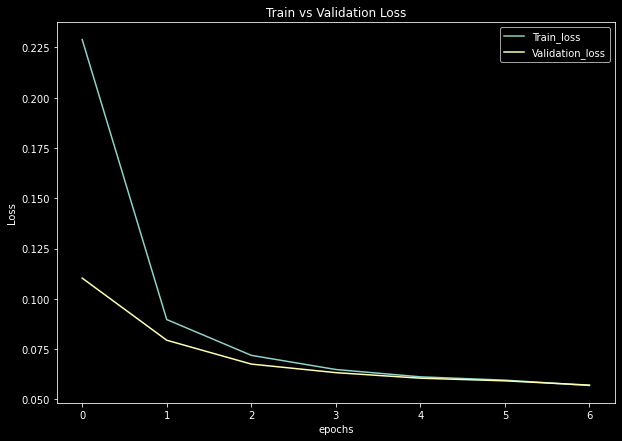

Q13. Plot the training and validation accuracy

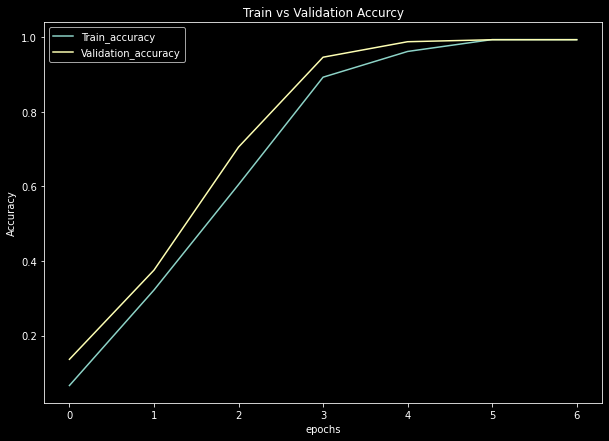

## 3.2 Training the embedding matrix

Q14. Create the following model

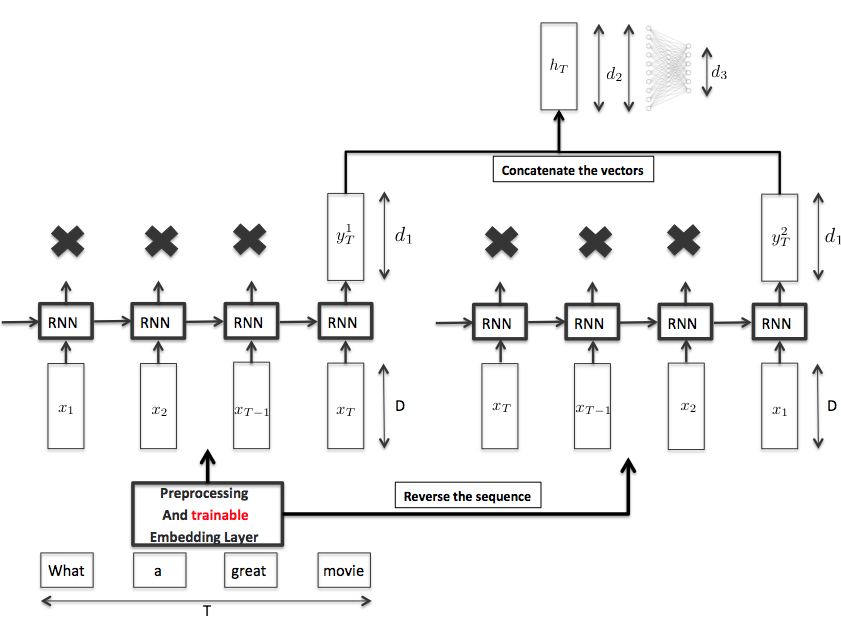

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/Model_2.png',  width=1000) 

Model: "sequential_4"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                                       Output Shape                                                Param #                
embedding_16 (Embedding)                                           (None, 200, 100)                                            2000000                
______________________________________________________________________________________________________________________________________________________
bidirectional_3 (Bidirectional)                                    (None, 64)                                                  34048                  
______________________________________________________________________________________________________________________________________________________
dense_12 (Dense)                                                   (None

Q15. Fit your new model to the training data. Plot the tranining and validation loss/accuracy. Then, evaluate your model on the test data

Epoch 1/20
100/100 [==============================] - 195s 2s/step - loss: 0.2455 - accuracy: 0.5460 - val_loss: 0.1375 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 199s 2s/step - loss: 0.1161 - accuracy: 0.9923 - val_loss: 0.0887 - val_accuracy: 0.9886 - lr: 0.0010


998/998 [==============================] - 31s 31ms/step - loss: 0.0913 - accuracy: 0.9886


[0.09132400900125504, 0.9886260628700256]

# Summary

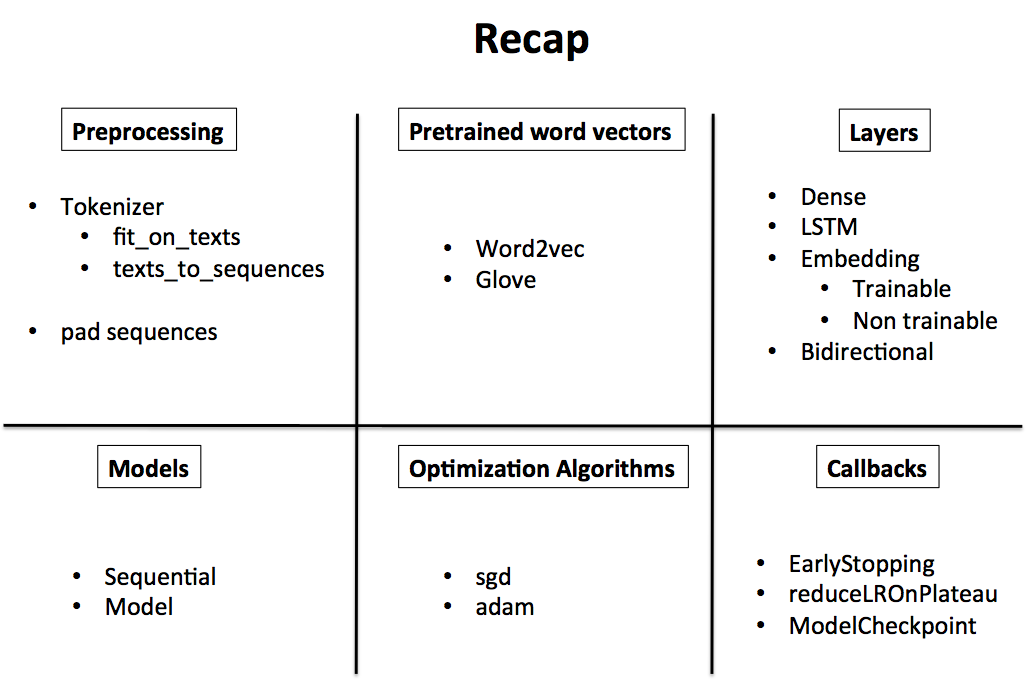

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/Recap.png',  width=1000) 

# To go further...

LSTM layers can be used to tackle a wide range of problems:

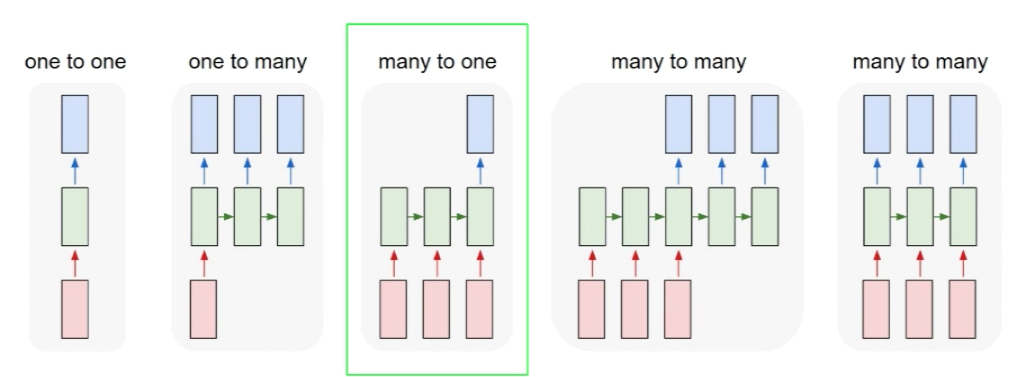

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/tgf.png',  width=1000) 

For Many to many problems when the length of the input sequence is different from the length of the output sequence, we use the following architecture decribed in the following paper: [Sequence to Sequence Learning
with Neural Networks](https://papers.nips.cc/paper/5346-sequence-to-sequence-learning-with-neural-networks.pdf):

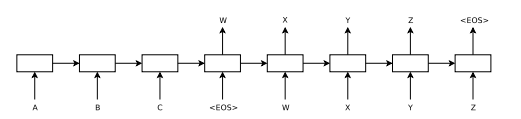

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/seq2seq.png',  width=1000) 

As seq2seq architecture don't handle very well long sentences, we use **Attention**, which aims at looking on a context in the input and weight it correctly to generate the output. 

A good reference for it : [Attention Is All You Need](https://arxiv.org/pdf/1706.03762v5.pdf)

An example of application in Speech Recognition:

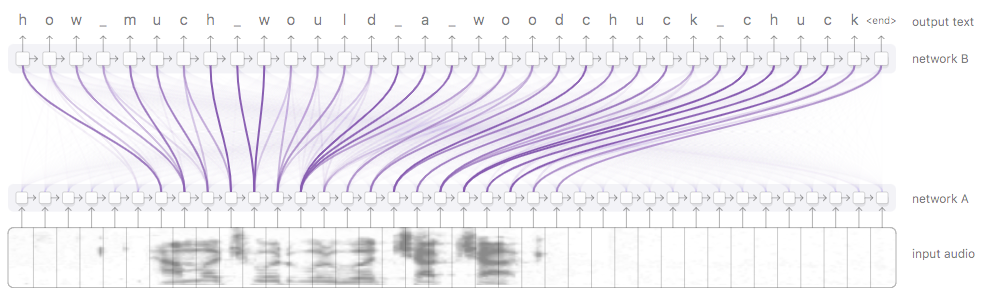

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/attention.png',  width=2000) 

A good reference for signal processing : "A Wavelet tour for signal processing" by Stephan Mallat. 

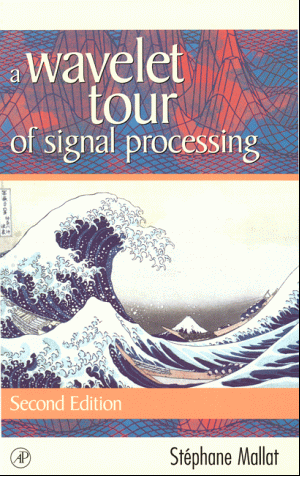

In [ ]:
Image(filename='./gdrive/My Drive/Colab Notebooks/Programming_Session_8/images/mallat.png',  width=300) 